In [ ]:
install.packages(c("tidyverse", "ggplot2", "FactoMineR", "factoextra"))
install.packages("tidyverse")  # Pour la manipulation des données
install.packages("caret")      # Pour la normalisation
install.packages("naniar")     # Pour visualiser les valeurs manquantes

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘corrplot’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘sparsevctrs’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’

In [ ]:
# Charger les bibliothèques nécessaires
library(tidyverse)
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(tidyverse)
library(caret)
library(naniar)
library(ggplot2)
library(corrplot)

# Charger les données
df <- read.csv("CPS1985.csv")

# Vérifier les premières lignes du dataset
head(df)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


corrplot 0.95 loaded



,rownames,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
2,1100,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
3,2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
4,3,4.00,12,4,22,cauc,other,male,worker,other,no,no
5,4,7.50,12,17,35,cauc,other,male,worker,other,no,yes
6,5,13.07,13,9,28,cauc,other,male,worker,other,yes,no


      wage          education       experience         age       
 Min.   : 1.000   Min.   : 2.00   Min.   : 0.00   Min.   :18.00  
 1st Qu.: 5.250   1st Qu.:12.00   1st Qu.: 8.00   1st Qu.:28.00  
 Median : 7.780   Median :12.00   Median :15.00   Median :35.00  
 Mean   : 9.024   Mean   :13.02   Mean   :17.82   Mean   :36.83  
 3rd Qu.:11.250   3rd Qu.:15.00   3rd Qu.:26.00   3rd Qu.:44.00  
 Max.   :44.500   Max.   :18.00   Max.   :55.00   Max.   :64.00  

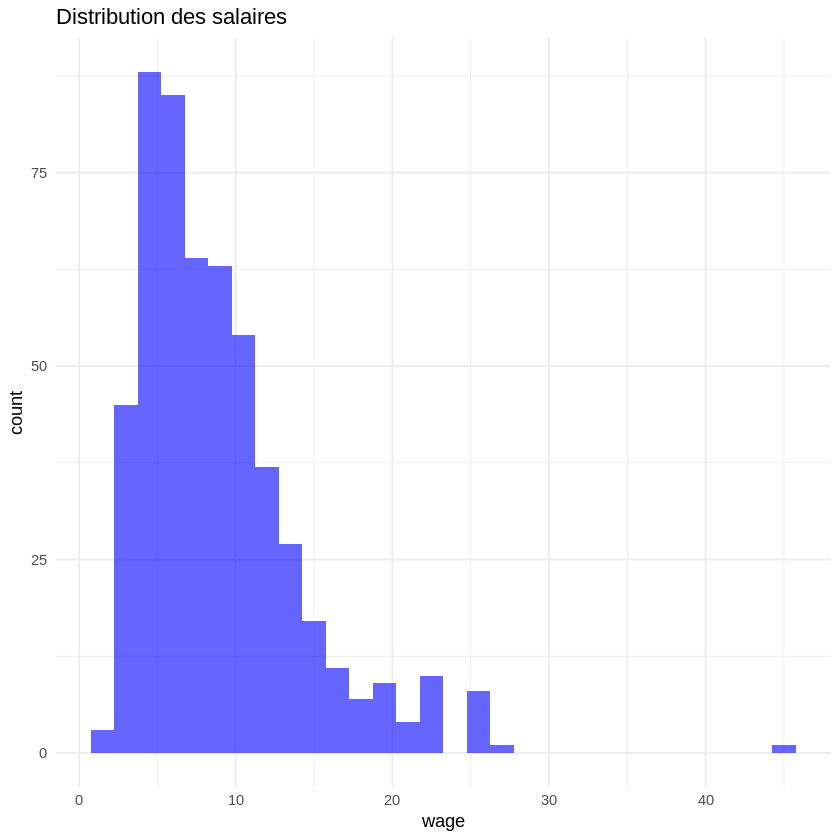

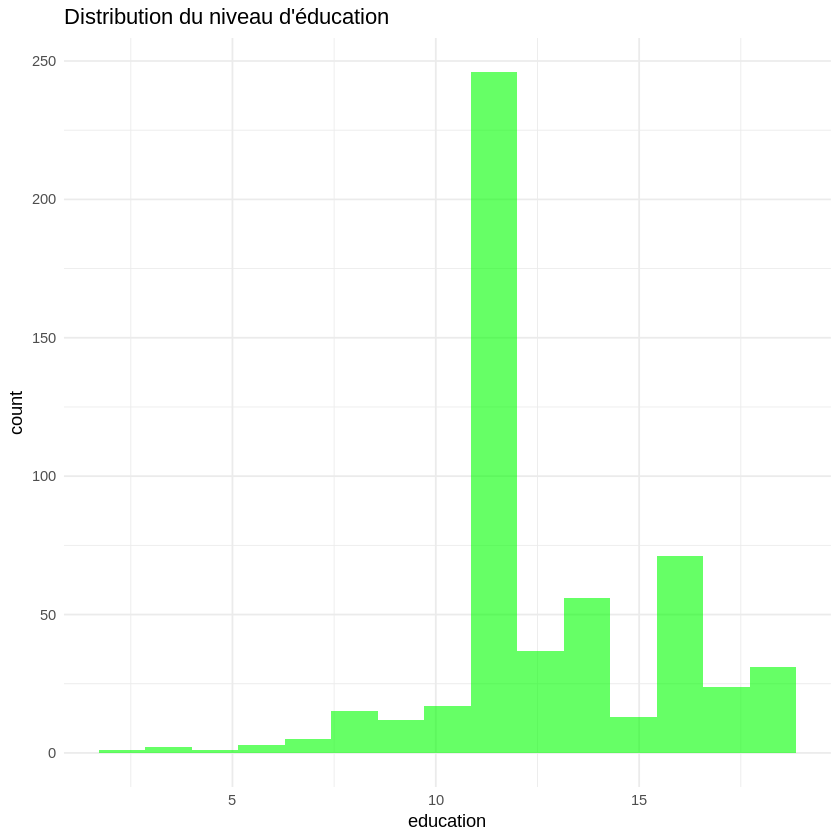

                 wage  education  experience        age
wage       1.00000000  0.3819221  0.08705953  0.1769669
education  0.38192207  1.0000000 -0.35267645 -0.1500195
experience 0.08705953 -0.3526764  1.00000000  0.9779612
age        0.17696688 -0.1500195  0.97796125  1.0000000


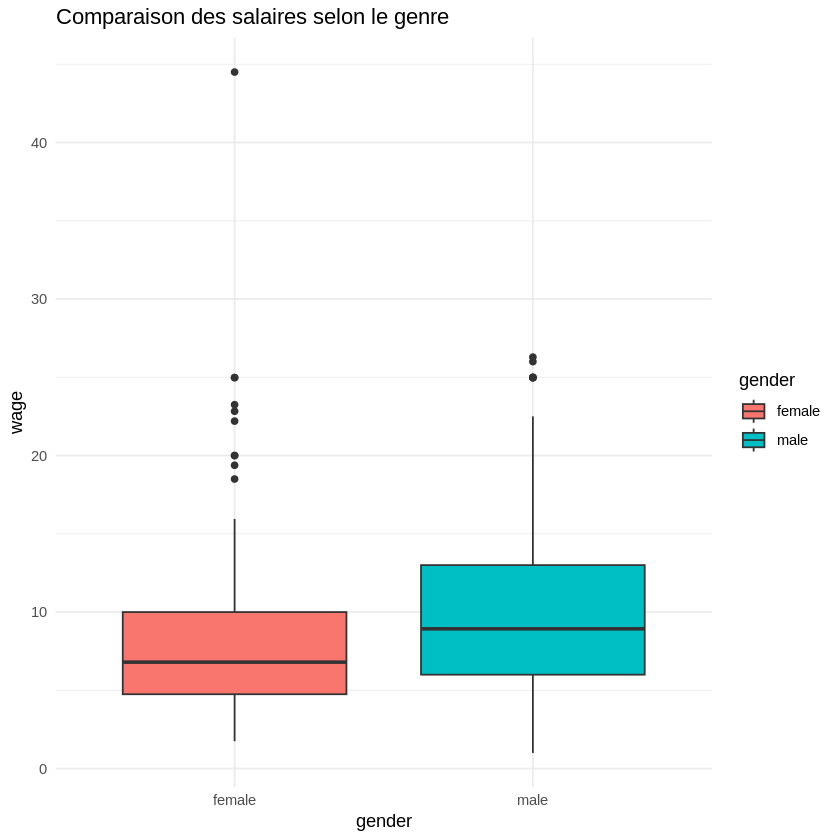

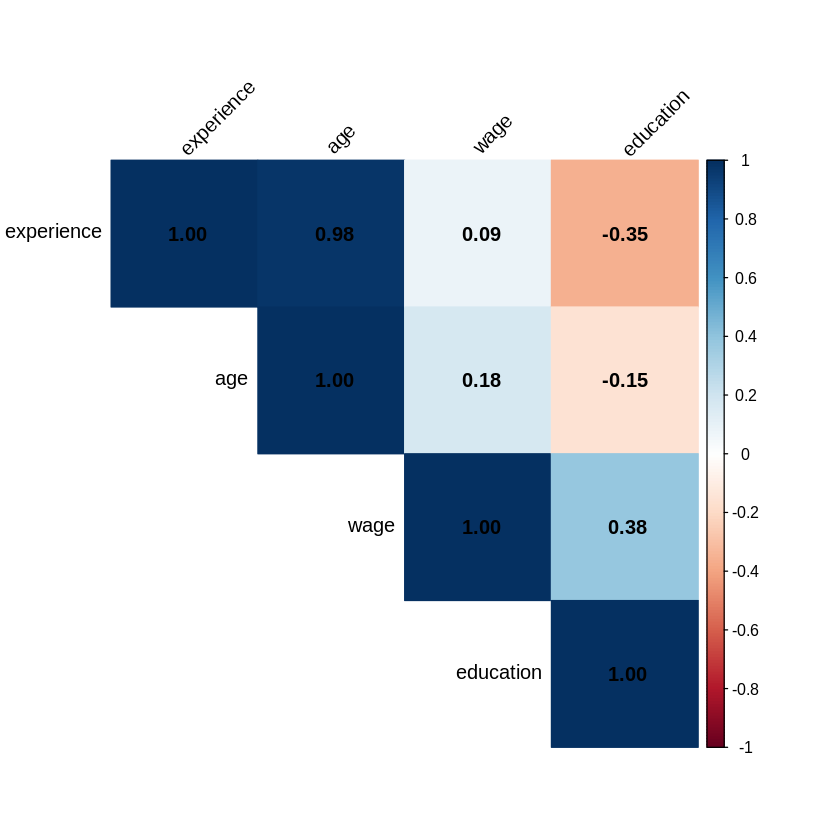

In [ ]:
# ------------------ ANALYSE DESCRIPTIVE ------------------

# Statistiques descriptives des variables numériques
summary(df[, c("wage", "education", "experience", "age")])

# Histogrammes des variables numériques
ggplot(df, aes(x = wage)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.6) +
  theme_minimal() + ggtitle("Distribution des salaires")

ggplot(df, aes(x = education)) +
  geom_histogram(bins = 15, fill = "green", alpha = 0.6) +
  theme_minimal() + ggtitle("Distribution du niveau d'éducation")

# Boxplot salaire selon le genre
ggplot(df, aes(x = gender, y = wage, fill = gender)) +
  geom_boxplot() +
  theme_minimal() +
  ggtitle("Comparaison des salaires selon le genre")
# La matrice de corrélations
df_numerique <- df[, c("wage", "education", "experience", "age")]
matrice_cor <- cor(df_numerique)
print(matrice_cor)
corrplot(matrice_cor, method = "color", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, addCoef.col = "black")

In [ ]:
# ------------------ PRETRAITEMENT DES DONNEES------------------
# Supprimer les colonnes inutiles
df_clean <- df %>%
  select(-rownames, -region, -occupation)
# Vérifier la présence de valeurs manquantes
sum(is.na(df_clean))  # Nombre total de valeurs manquantes
colSums(is.na(df_clean))  # Nombre de valeurs manquantes par colonne
df_clean <- df_clean %>%
  mutate(across(where(is.numeric), scale))
df <- df_clean
head(df)

[1] 0

wage  education experience        age  ethnicity     gender     sector 
         0          0          0          0          0          0          0 
     union    married 
         0          0

,wage,education,experience,age,ethnicity,gender,sector,union,married
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,<chr>
1,-0.7635707,-1.9189337,0.25670251,-0.1563401,hispanic,female,manufacturing,no,yes
2,-0.7927587,-1.5365790,1.95302656,1.7197409,cauc,female,manufacturing,no,yes
3,-0.4580695,-0.3895149,-1.35884421,-1.5207626,cauc,male,manufacturing,no,no
4,-0.9776161,-0.3895149,-1.11651220,-1.2649334,cauc,male,other,no,no
5,-0.2965626,-0.3895149,-0.06640684,-0.1563401,cauc,male,other,no,yes
6,0.7872855,-0.0071602,-0.71262552,-0.7532749,cauc,male,other,yes,no


In [ ]:
# ------------------ REGRESSION LINEAIRE ------------------
dfR <- df %>%
  mutate(
    gender = as.factor(gender),
    sector = as.factor(sector),
    ethnicity = as.factor(ethnicity),
    married = as.factor(married),
    union = as.factor(union)
  )
# Modèle de régression linéaire : salaire en fonction de plusieurs variables
model <- lm(wage ~ education + experience + age + gender + sector + union + married + ethnicity, data = dfR)
summary(model)  # Résumé du modèle



Call:
lm(formula = wage ~ education + experience + age + gender + sector + 
    union + married + ethnicity, data = dfR)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7658 -0.5246 -0.1521  0.3816  7.3933 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.26742    0.20044  -1.334   0.1827    
education            0.69641    0.56465   1.233   0.2180    
experience           1.27857    2.67303   0.478   0.6326    
age                 -0.98018    2.53021  -0.387   0.6986    
gendermale           0.40711    0.07716   5.276 1.94e-07 ***
sectormanufacturing  0.13663    0.19772   0.691   0.4899    
sectorother         -0.07007    0.18619  -0.376   0.7068    
unionyes             0.28858    0.09955   2.899   0.0039 ** 
marriedyes           0.08068    0.08175   0.987   0.3241    
ethnicityhispanic   -0.05331    0.17279  -0.309   0.7578    
ethnicityother      -0.21022    0.11340  -1.854   0.0643 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 534 individuals, described by 4 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

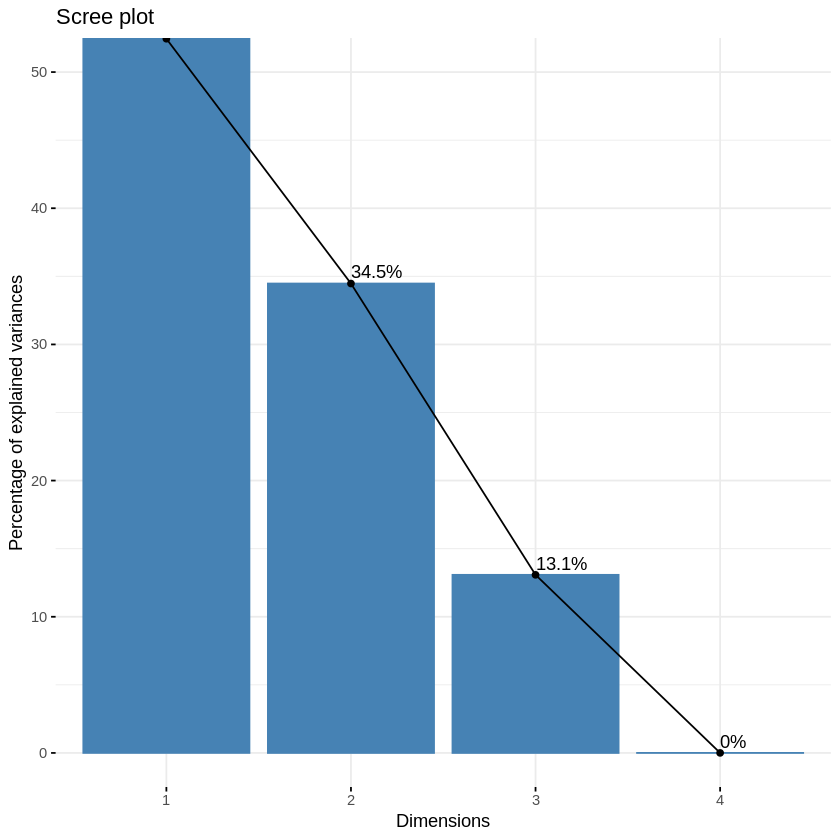

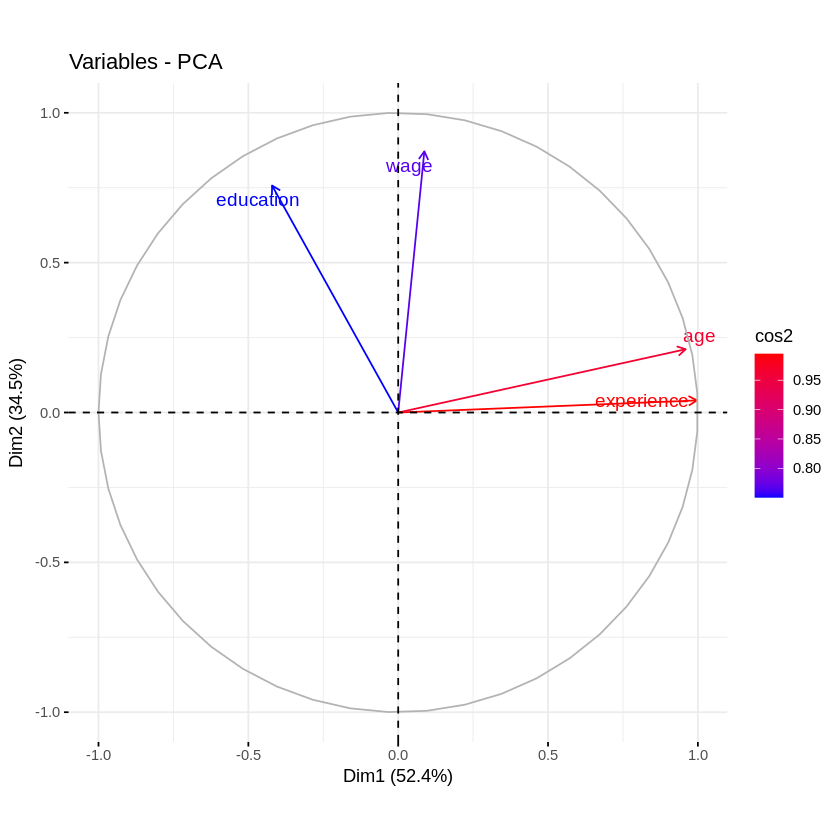

                Dim.1      Dim.2     Dim.3        Dim.4
wage        0.3627955 55.0590990 44.578105 1.698030e-07
education   8.4418123 41.5902502 47.678940 2.288998e+00
experience 47.3365863  0.1177141  1.003081 5.154262e+01
age        43.8588059  3.2329366  6.739874 4.616838e+01


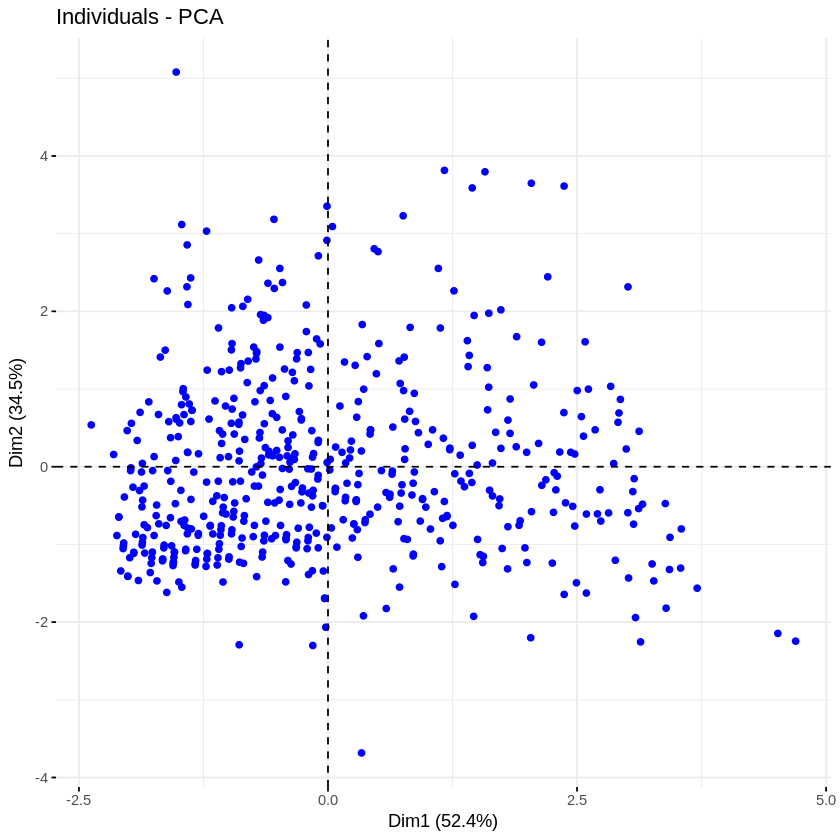

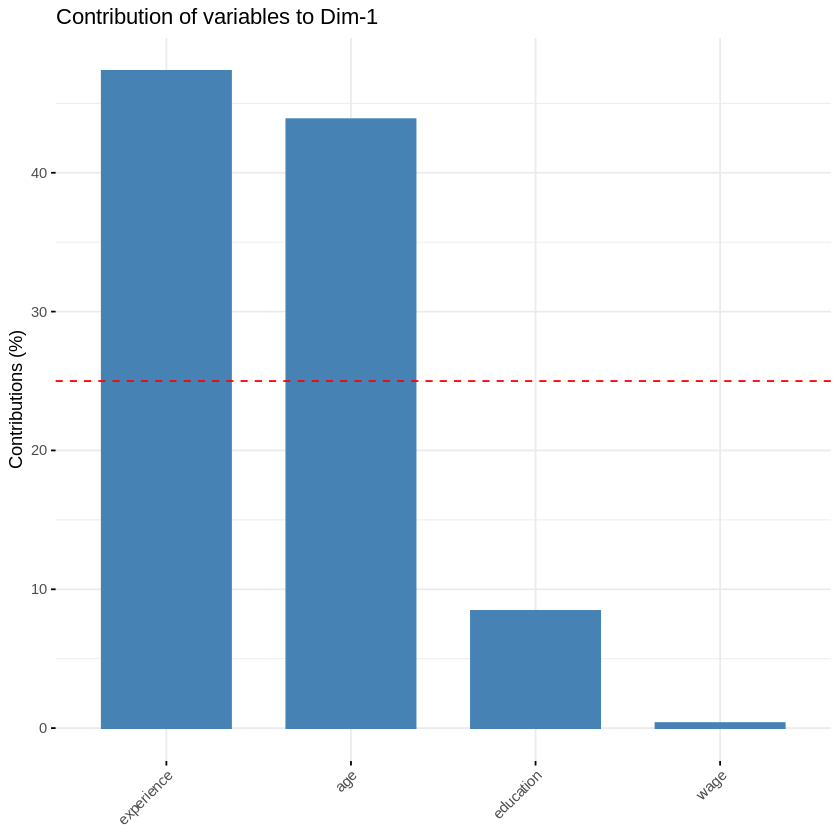

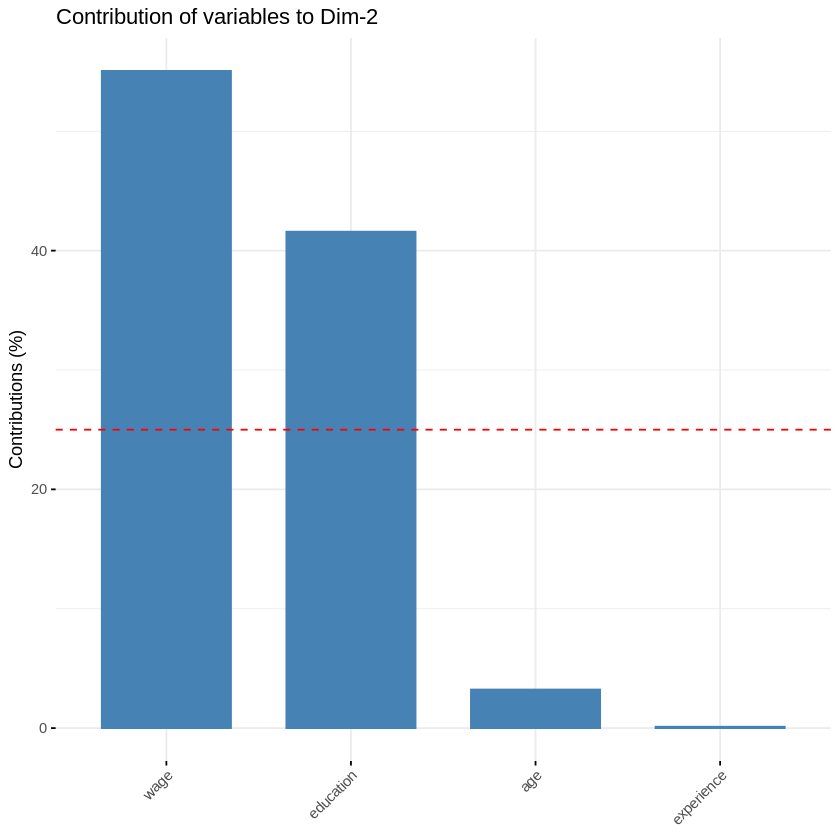

In [ ]:
# ------------------ ACP (Analyse en Composantes Principales) ------------------

# Sélectionner les variables numériques pour l'ACP
df_acp <- df[, c("wage", "education", "experience", "age")]

# Appliquer l'ACP
res.pca <- PCA(df_acp, scale.unit = TRUE, graph = FALSE)

# Afficher les résultats de l'ACP
print(res.pca)

# Visualisation des valeurs propres (pourcentage de variance expliquée)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

# Visualisation des variables dans le plan factoriel
fviz_pca_var(res.pca, col.var = "cos2", gradient.cols = c("blue", "red"), repel = TRUE)

# Visualisation des individus dans le plan factoriel
fviz_pca_ind(res.pca, repel = TRUE, geom = "point", col.ind = "blue")
# Extraire les contributions des variables aux axes
contributions_var <- res.pca$var$contrib

# Afficher les contributions des variables aux axes
print(contributions_var)

# Visualiser les contributions des variables aux axes (graphique en barres)
fviz_contrib(res.pca, choice = "var", axes = 1, top = 4)  # Contributions à l'axe 1
fviz_contrib(res.pca, choice = "var", axes = 2, top = 4)  # Contributions à l'axe 2


In [ ]:
anova_model <- aov(wage ~ gender + union, data = df_clean)
summary(anova_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
gender        1   22.5  22.480  23.810 1.41e-06 ***
union         1    9.2   9.167   9.709  0.00193 ** 
Residuals   531  501.4   0.944                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1